# Getting started with KinoML

## Introduction

KinoML is a modular and extensible framework for kinase modelling and machine learning. KinoML can be used to obtain data from online and in-house data sources and to featurize data so that it is ML-readable. KinoML also allows users to easily run ML experiments with KinoML's implemented models. 


In this notebook you will learn how to install KinoML and how to:
1. Obtain your dataset from ChEMBL
2. Featurize this data
3. Train and test a simple Support Vector Classifier (SVC) ML model with your featurized data 

And KinoML allows you to do this with just a few lines of code!

For more extensive examples and tutorials have a look at the other notebooks in the [KinoML documentation](https://openkinome.org/kinoml/index.html) or at the [experiments-binding-affnity](https://github.com/openkinome/experiments-binding-affinity) repository.

The [KinoML documentation](https://openkinome.org/kinoml/api/kinoml/index.html) also allows browsing the API.

![KinoML object model](../../kinoml/data/fig_1_kinomltechpaper_v2.png)  
**Fig. 1:** KinoML workflow overview. Colors represent objects that belong to the same class.

## Installation

KinoML can be easily installed using conda/mamba. We highly encourage using mamba instead of conda to speed up the installation.

```
mamba create -n kinoml --no-default-packages
mamba env update -n kinoml -f https://raw.githubusercontent.com/openkinome/kinoml/master/devtools/conda-envs/test_env.yaml
conda activate kinoml
pip install https://github.com/openkinome/kinoml/archive/master.tar.gz
```

## Basic example

KinoML has a strong focus on kinases, but can be applied to other proteins, if the appropriate code is written. However, the work on kinases is the easiest, since we provide cleaned kinase datasets for ChEMBL and PKIS2, which are hosted at the [kinodata](https://github.com/openkinome/kinodata) repository.

## 1. Obtaining your data

### DatasetProvider

KinoML's `DatasetProvider` allows users to easily access and filter datasets. The user can specify the url of the csv file they are interested in or can use the default (as done in the example below). There are different types of `DatasetProvider` incorporated into KinoML. The one used in this notebook is `ChEMBLDatasetProvider`, which allows users to use ChEMBL datasets and filter them by specifying the measurement type ("pIC50", "pKi", "pKd") and kinase uniprotID.

`DatasetProvider` outputs a lists of `measurement` values, and each of them will be associated to their corresponding `system`, which is formed by a protein and a ligand. Also, the `measurement` objects also have `Metadata` and `AssayConditions` associated to it, which contains information on how this measurement was obtained. 

In [1]:
%%capture --no-display
# to hide warnings
from kinoml.datasets.chembl import ChEMBLDatasetProvider

In [2]:
chembl_provider = ChEMBLDatasetProvider.from_source(
    measurement_types=["pIC50"], #selecting measurement type
    uniprot_ids=["P00533"], #kinase of interest
    sample=1000, #number of samples you want to work with
)
chembl_provider

  0%|          | 0/1000 [00:00<?, ?it/s]

<ChEMBLDatasetProvider with 1000 measurements (pIC50Measurement=1000), and 986 systems (KLIFSKinase=1, Ligand=986)>

Just looking at the output, we can see that there are 1000 measurements, but only 986 systems. This means there are duplicates in the `measurements`. Ideally we would delete these duplicated entries, but since this notebook just wants to show a quick example, we will leave this for the other notebooks.  Let's continue and have a look at the first measurement and the stored information.

In [3]:
chembl_provider.measurements[0]

<pIC50Measurement values=[5.13076828] conditions=<AssayConditions pH=7> system=<ProteinLigandComplex with 2 components (<KLIFSKinase name=P00533>, <Ligand name=OCCCCNc1cncc(-c2cncc(Nc3cccc(Cl)c3)n2)c1>)>>

In [4]:
chembl_provider.measurements[0].values

array([5.13076828])

In [5]:
chembl_provider.measurements[0].system

<ProteinLigandComplex with 2 components (<KLIFSKinase name=P00533>, <Ligand name=OCCCCNc1cncc(-c2cncc(Nc3cccc(Cl)c3)n2)c1>)>

In [6]:
chembl_provider.measurements[0].system.ligand

<Ligand name=OCCCCNc1cncc(-c2cncc(Nc3cccc(Cl)c3)n2)c1>

In [7]:
chembl_provider.measurements[0].system.protein

<KLIFSKinase name=P00533>

As explained above, each measurement comes with a `values` array representing the activity values for this measurement, which can be considered the typical `y` we want to predict in an ML experiment. The `system` object contains relevant information about `protein` and `ligand` for this measurement. The `system` information is typically `X` in an ML experiment, but is not yet in a machine-friendly format.

## 2. Featurize your data

### Featurizer

To get the `X` (`system` information) in a machine-friendly format, KinoML uses so called featurizers, which encode the information of each system. KinoML has different featurizers implemented. In this notebook we will use the `MorganFingerprintFeaturizer`. We are going to iterate this featurizer over all `systems` and transform the `ligand` into a bit vector. All performed featurizations are commonly stored in the `featurizations` attribute of each system. The `last` performed featurization is stored additionally for easy access.

In [8]:
from kinoml.features.ligand import MorganFingerprintFeaturizer

In [9]:
%%capture --no-display
# to hide warnings
chembl_provider.featurize(MorganFingerprintFeaturizer())
chembl_provider.measurements[0].system.featurizations

{'last': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0

For more details on the KinoML object model have a look at the respective [notebook](https://openkinome.org/kinoml/notebooks/kinoml_object_model.html).

## 3. ML model training and testing

### ML training and testing

Great, we have used KinoML to first obtain the data we wanted to work with, and then to featurize this data and make it ML readable. Now that we have `X` and `y`, we can run a small ML experiment. In this case, we will train a [support vector classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) from sklearn. 

In [10]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [11]:
# get data from provider
X, y = chembl_provider.to_numpy()[0]
print(X[0])
print(y[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 

In [12]:
# binarize activity values
y = (y > 7).astype(int)
print(y[0])

0


In [13]:
# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
# train the support vector classifier
svc = SVC(probability=True)
svc.fit(x_train, y_train)

SVC(probability=True)

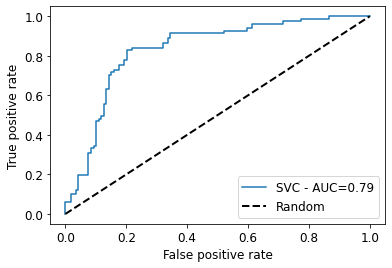

In [15]:
# get the ROC curve including AUC
y_test_pred = svc.predict(x_test)
svc_roc_auc = roc_auc_score(y_test, y_test_pred)
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr, label=f'SVC - AUC={round(svc_roc_auc,2)}')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], linestyle='--', label='Random', lw=2, color="black")  # Random curve
plt.xlabel('False positive rate', size=12)
plt.ylabel('True positive rate', size=12)
plt.tick_params(labelsize=12)
plt.legend(fontsize=12)
plt.show()

For more advanced examples have a look at the [experiments-binding-affinity](https://github.com/openkinome/experiments-binding-affinity) repository.